In [2]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
from all_funcs import mod_df
from all_funcs import add_factor
from all_funcs import three_graphs_one_plot
from all_funcs import fac_plots
from all_funcs import cap_outliers_by_list
from all_funcs import find_outliers_IQR
from all_funcs import ult_analysis
from all_funcs import test_mannwhitneyu
from all_funcs import siegel_tukey
from all_funcs import get_corr
from all_funcs import plot_pred
from all_funcs import train_test_split
from all_funcs import series_to_supervised
from all_funcs import pred_val
from all_funcs import graphs
from all_funcs import make_autocorr_plot
from all_funcs import make_autocorr_plot
# from all_funcs import persistence
# from all_funcs import make_forecasts
# from all_funcs import evaluate_forecasts
# from all_funcs import plot_forecasts
# from all_funcs import split_into_sequences
# from all_funcs import get_train_test_sets
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions
from sklearn.ensemble import RandomForestRegressor
from lineartree import LinearBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
dfs = []
for name in ['datasets\газпром-капитал.xlsx', 'datasets\газпром-нефть.xlsx' , 'datasets\гсп-финанс.xlsx']:
  dfs.append(mod_df(name))

In [4]:
for i in range(len(dfs)):
  for name in ['datasets/rucbitr3+.xlsx', 'datasets/rucbcp3a3yns.xlsx',  'datasets/indexes.xlsx', 'datasets/ставка-ruonia.xlsx', 'datasets/usd_rub-(fx) (1).xlsx',
              'datasets/corp_bonds_volume.xlsx', 'datasets/cpi.xlsx', 'datasets/inflation.xlsx', 'datasets/rub-yield-curve-10y (1).xlsx',
               'datasets/ofz_volume.xlsx',  'datasets/umemployment.xlsx']:
    dfs[i] = add_factor(dfs[i], name)
    dfs[i]['key_0'] = pd.to_datetime(dfs[i]['key_0'])
    dfs[i] = dfs[i].set_index('key_0')

In [5]:
dfs[2]

,Indicative,YTM Indicative,G-spread,t,ISIN,name,RUCBITR3+,RUCBCP3A3YNS,indexes,Ставка RUONIA,USD/RUB (FX),"Объем рынка корпоративных облигаций - Россия, RUB",Россия базовые потребительские цены,Россия уровень инфляции в годовом выражении,RUB Yield Curve 10Y,"Объем рынка ОФЗ - Россия, RUB",Россия уровень безработицы
key_0,,,,,,,,,,,,,,,,,
2022-01-03,95.550,9.6897,148.998138,1,RU000A102KZ6,datasets\гсп-финанс.xlsx,579.67,100.51,9.5,8.04,74.58064,17569.19,100.8,8.73,8.3678,15609.31,4.4
2022-01-04,95.550,9.6930,149.371476,2,RU000A102KZ6,datasets\гсп-финанс.xlsx,581.62,100.72,9.5,8.04,75.16675,17569.19,100.8,8.73,8.3704,15609.31,4.4
2022-01-05,95.550,9.6963,150.800530,3,RU000A102KZ6,datasets\гсп-финанс.xlsx,582.30,100.80,9.5,8.04,76.11534,17569.19,100.8,8.73,8.3386,15609.31,4.4
2022-01-06,95.800,9.5443,109.462920,4,RU000A102KZ6,datasets\гсп-финанс.xlsx,581.72,100.56,9.5,8.04,76.43210,17569.19,100.8,8.73,8.4660,15609.31,4.4
2022-01-07,95.800,9.5443,109.462920,5,RU000A102KZ6,datasets\гсп-финанс.xlsx,580.31,100.32,9.5,8.04,75.27871,17569.19,100.8,8.73,8.5759,15609.31,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-13,97.890,10.0657,240.593697,435,RU000A102KZ6,datasets\гсп-финанс.xlsx,626.14,101.55,7.5,7.02,75.55000,21262.38,100.1,3.50,10.7822,18737.62,3.5
2023-03-14,98.080,9.7954,208.449803,436,RU000A102KZ6,datasets\гсп-финанс.xlsx,626.41,101.56,7.5,7.14,75.75000,21262.38,100.1,3.50,10.8069,18737.62,3.5
2023-03-15,98.325,9.4436,182.673300,437,RU000A102KZ6,datasets\гсп-финанс.xlsx,626.72,101.59,7.5,7.29,76.42500,21262.38,100.1,3.50,10.8428,18737.62,3.5


In [6]:
dfs[2].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 439 entries, 2022-01-03 to 2023-03-17
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Indicative                                         439 non-null    float64
 1   YTM Indicative                                     439 non-null    float64
 2   G-spread                                           439 non-null    float64
 3   t                                                  439 non-null    int64  
 4   ISIN                                               439 non-null    object 
 5   name                                               439 non-null    object 
 6   RUCBITR3+                                          439 non-null    float64
 7   RUCBCP3A3YNS                                       439 non-null    float64
 8   indexes                                            439 non-null    floa

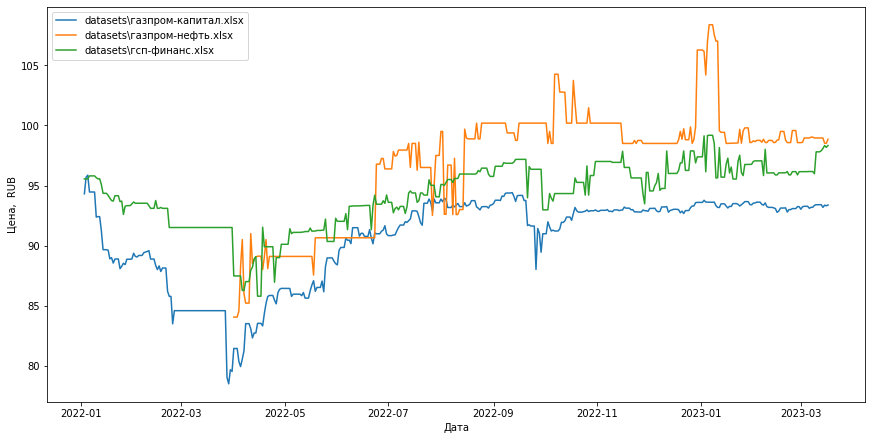

In [7]:
three_graphs_one_plot([dfs[0], dfs[1], dfs[2]])

In [8]:
df_alph_full = dfs[2][dfs[2].index >= '2022-05-01']
df_alph_full['t'] = [i for i in range(len(df_alph_full))]

C:\Temp\ipykernel_12976\226757162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alph_full['t'] = [i for i in range(len(df_alph_full))]


Text(0.5, 0, 'Дата')

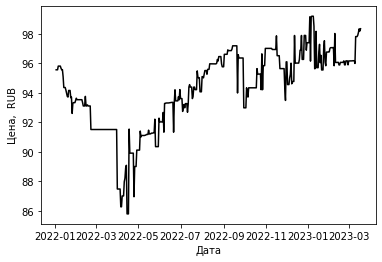

In [74]:
plt.plot(pd.date_range(start='2022-01-03',end='2023-03-17'), dfs[2]['Indicative'], 'k-')
plt.ylabel("Цена,  RUB")
plt.xlabel("Дата")

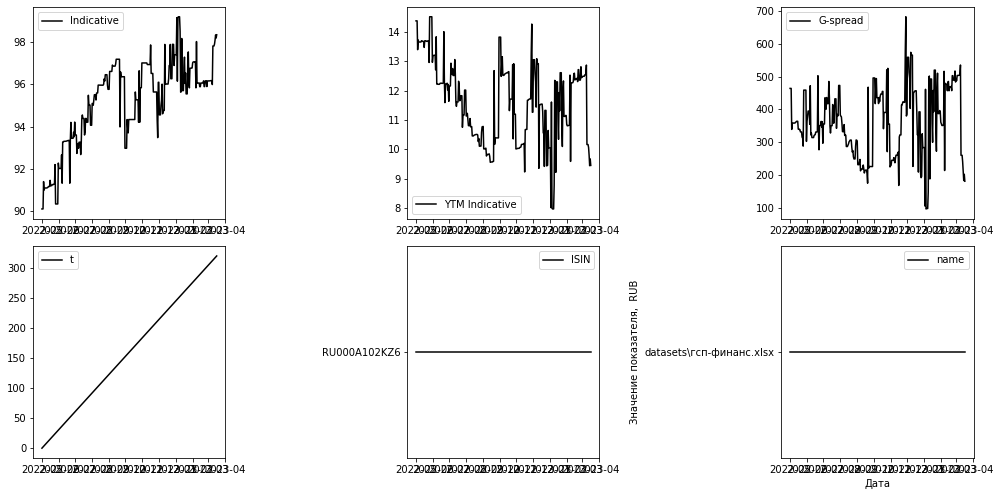

In [10]:
fac_plots(df_alph_full)

In [11]:
df_alph = df_alph_full.copy()

In [12]:
outliers = {}
for name in df_alph.select_dtypes(include = numerics).columns:
  outliers['{}'.format(name)] = find_outliers_IQR(df_alph[name])

for name in df_alph.select_dtypes(include = numerics).columns:
  if len(outliers[name]) > 0:
    df_alph[name] = cap_outliers_by_list(df_alph[name])

for name in df_alph.select_dtypes(include = numerics).columns:
    df_alph.loc[df_alph[('2022-09'<df_alph.index) & (df_alph.index<='2022-12')].index, name] = cap_outliers_by_list(df_alph.loc[df_alph[('2022-09'<df_alph.index) & (df_alph.index<='2022-12')].index, name])

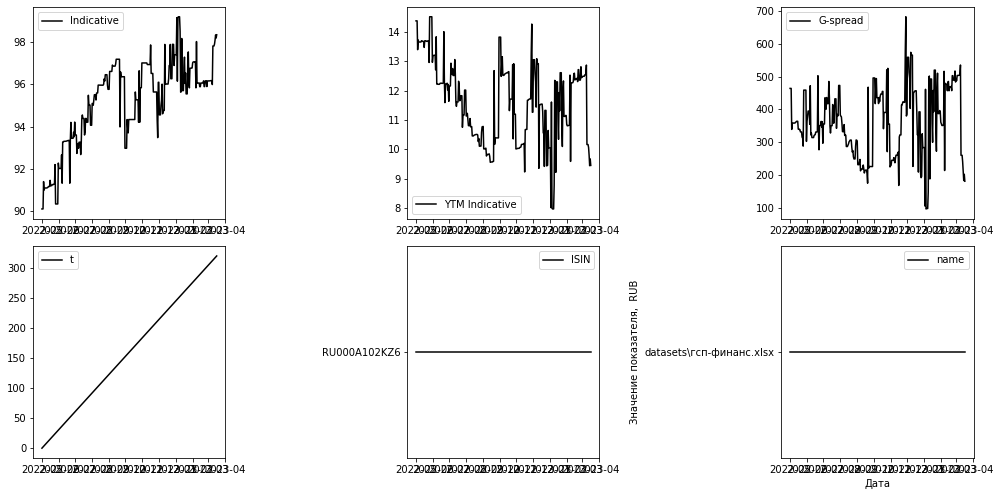

In [13]:
fac_plots(df_alph)

MSE = 0.8631


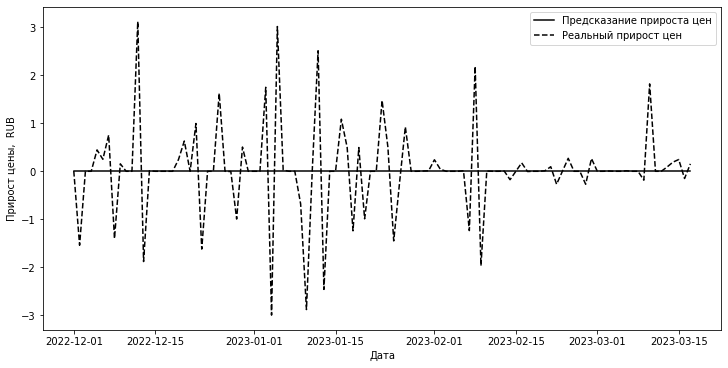

In [14]:
#Trivial model

pred_val((df_alph['Indicative'][213:] - df_alph['Indicative'][213:].shift(1)).dropna(), [0 for i in range(107)])

### Linear models

In [15]:
siegel_tukey(df_alph['Indicative'])
test_mannwhitneyu(df_alph['Indicative'])

z value: -3.524
Probably different distributions
stat=4.85e+03, p=4.85e+03
Probably different distributions


In [16]:
df_alph['Indicative'] = df_alph['Indicative'] - df_alph['Indicative'].shift(1)
df_alph_uni = df_alph[['Indicative', 't']]
df_alph_uni = df_alph_uni[1:]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_alph_uni['t'], df_alph_uni['Indicative'], 107)

In [18]:
import statsmodels.api as sm

X_lm = sm.add_constant(X_train)
regr = sm.OLS(y_train, X_lm)
regr2 = regr.fit()
print(regr2.summary())

                            OLS Regression Results                            
Dep. Variable:             Indicative   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.2292
Date:                Sat, 10 Jun 2023   Prob (F-statistic):              0.633
Time:                        16:22:21   Log-Likelihood:                -219.77
No. Observations:                 213   AIC:                             443.5
Df Residuals:                     211   BIC:                             450.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0670      0.094      0.714      0.4

MSE = 0.8659


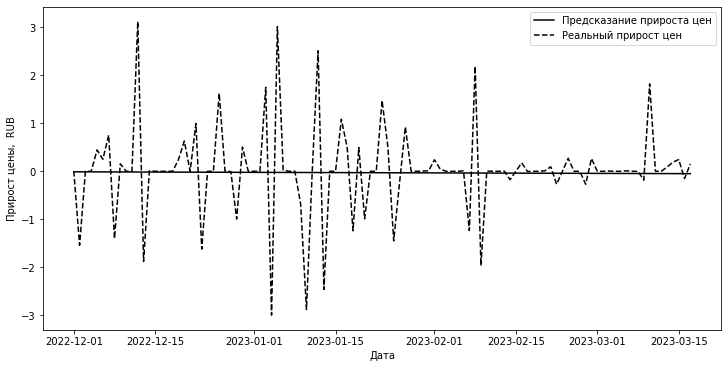

In [19]:

prediction = regr2.predict(sm.add_constant(X_test))

print('MSE = %.4g' % mean_squared_error(y_test, prediction))

plot_pred(prediction, y_test)

### ARIMA

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


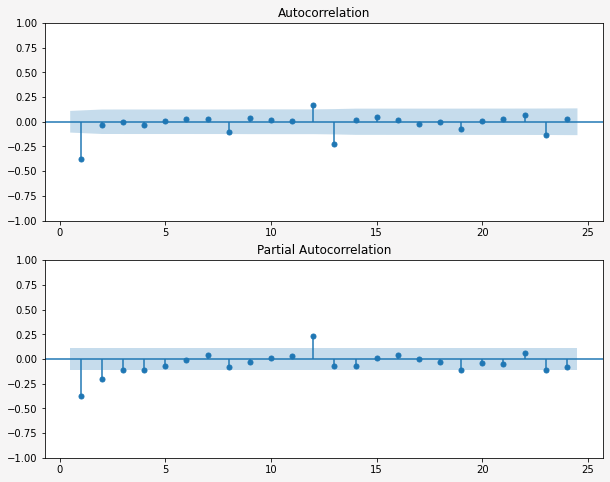

In [20]:
make_autocorr_plot(df_alph_uni['Indicative'])

In [21]:
train = df_alph_uni['Indicative'][:213]
test = df_alph_uni['Indicative'][213:]

In [22]:
arima_model = ARIMA(train, order = (1,0,1))
model = arima_model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:             Indicative   No. Observations:                  213
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -201.008
Date:                Sat, 10 Jun 2023   AIC                            410.016
Time:                        16:22:24   BIC                            423.462
Sample:                    05-02-2022   HQIC                           415.450
                         - 11-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0235      0.028      0.827      0.408      -0.032       0.079
ar.L1          0.0623      0.140      0.446      0.656      -0.212       0.336
ma.L1         -0.5103      0.137     -3.728      0.0

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MSE = 0.867


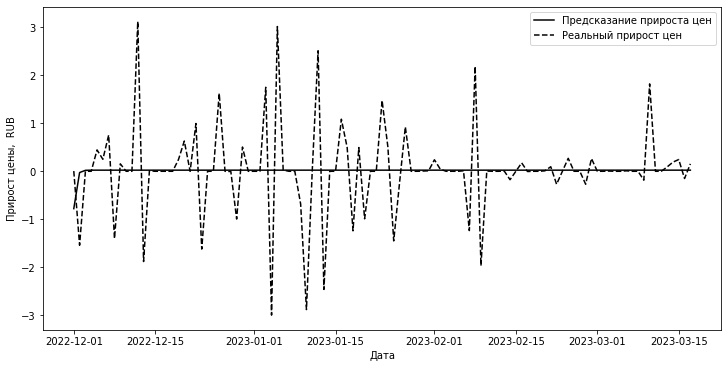

In [23]:
prediction = model.forecast(107)

print('MSE = %.4g' % mean_squared_error(test, prediction))

plot_pred(prediction, test)

### LSTM

In [24]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
 n_vars = 1 if type(data) is list else data.shape[1]
 df = pd.DataFrame(data)
 cols, names = list(), list()
 # input sequence (t-n, ... t-1)
 for i in range(n_in, 0, -1):
  cols.append(df.shift(i))
 names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
 # forecast sequence (t, t+1, ... t+n)
 for i in range(0, n_out):
  cols.append(df.shift(-i))
 if i == 0:
  names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
 else:
  names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
 # put it all together
 agg = pd.concat(cols, axis=1)
 agg.columns = names
 # drop rows with NaN values
 if dropnan:
  agg.dropna(inplace=True)
 return agg


def persistence(last_ob, n_seq):
 return [last_ob for i in range(n_seq)]

# evaluate the persistence model
def make_forecasts(train, test, n_lag, n_seq):
	forecasts = list()
	for i in range(len(test)):
		X, y = test[i, 0:n_lag], test[i, n_lag:]
		# make forecast
		forecast = persistence(X[-1], n_seq)
		# store the forecast
		forecasts.append(forecast)
	return forecasts

# evaluate the RMSE for each forecast time step
def evaluate_forecasts(test, forecasts, n_lag, n_seq):
	for i in range(n_seq):
		actual = test[:,(n_lag+i)]
		predicted = [forecast[i] for forecast in forecasts]
		rmse = np.sqrt(mean_squared_error(actual, predicted))
		print('t+%d RMSE: %f' % ((i+1), rmse))
                
# plot the forecasts in the context of the original dataset
def plot_forecasts(series, forecasts, n_test):
	# plot the entire dataset in blue
	plt.plot(series.values)
	# plot the forecasts in red
	for i in range(len(forecasts)):
		off_s = len(series) - n_test + i
		off_e = off_s + len(forecasts[i])
		xaxis = [x for x in range(off_s, off_e)]
		plt.plot(xaxis, forecasts[i], color='red')
	# show the plot
	plt.show()

In [25]:
def split_into_sequences(data, seq_len):
    n_seq = len(data) - seq_len + 1
    return np.array([data[i:(i+seq_len)] for i in range(n_seq)])

def get_train_test_sets(data, seq_len, train_frac):
    sequences = split_into_sequences(data, seq_len)
    n_train = int(sequences.shape[0] * train_frac)
    X_train = sequences[:n_train, :-1, :]
    y_train = sequences[:n_train, -1, :]
    X_test = sequences[n_train:, :-1, :]
    y_test = sequences[n_train:, -1, :]
    return X_train, y_train, X_test, y_test

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# fit the format of the scaler -> convert shape from (1000, ) -> (1000, 1)
price = df_alph['Indicative'].values.reshape(-1, 1)
scaled_price = scaler.fit_transform(price)

In [27]:
seq_len = 50

x_train, y_train, x_test, y_test = get_train_test_sets(scaled_price, seq_len, train_frac=0.61)
# x_train, y_train, x_test, y_test = get_train_test_sets(df_alph['Indicative'].values.reshape(-1, 1), seq_len, train_frac=0.525)


In [28]:
len(y_test)

107

In [29]:
# fraction of the input to drop; helps prevent overfitting
dropout = 0.2
window_size = seq_len - 1

# build a 3-layer LSTM RNN
model = keras.Sequential()

model.add(
    LSTM(window_size, return_sequences=True, 
         input_shape=(window_size, x_train.shape[-1]))
)

model.add(Dropout(rate=dropout))
# Bidirectional allows for training of sequence data forwards and backwards
model.add(
    Bidirectional(LSTM((window_size * 2), return_sequences=True)
)) 

model.add(Dropout(rate=dropout))
model.add(
    Bidirectional(LSTM(window_size, return_sequences=False))
) 

model.add(Dense(units=1))
# linear activation function: activation is proportional to the input
model.add(Activation('linear'))

In [30]:
x_train = x_train[1:]
y_train = y_train[1:]

In [31]:
batch_size = 15

model.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=batch_size,
    shuffle=False,
    validation_split=0.2
)

Epoch 1/10
9/9 [==============================] - 23s 884ms/step - loss: 0.0714 - val_loss: 0.0269
Epoch 2/10
9/9 [==============================] - 1s 145ms/step - loss: 0.0215 - val_loss: 0.0159
Epoch 3/10
9/9 [==============================] - 1s 145ms/step - loss: 0.0153 - val_loss: 0.0133
Epoch 4/10
9/9 [==============================] - 1s 126ms/step - loss: 0.0138 - val_loss: 0.0111
Epoch 5/10
9/9 [==============================] - 1s 121ms/step - loss: 0.0129 - val_loss: 0.0107
Epoch 6/10
9/9 [==============================] - 1s 107ms/step - loss: 0.0128 - val_loss: 0.0103
Epoch 7/10
9/9 [==============================] - 1s 113ms/step - loss: 0.0126 - val_loss: 0.0102
Epoch 8/10
9/9 [==============================] - 1s 132ms/step - loss: 0.0128 - val_loss: 0.0102
Epoch 9/10
9/9 [==============================] - 1s 115ms/step - loss: 0.0127 - val_loss: 0.0102
Epoch 10/10
9/9 [==============================] - 1s 112ms/step - loss: 0.0127 - val_loss: 0.0102


In [32]:
y_pred = model.predict(x_test)

# invert the scaler to get the absolute price data
y_test_orig = scaler.inverse_transform(y_test)
y_pred_orig = scaler.inverse_transform(y_pred)

MSE = 0.8724


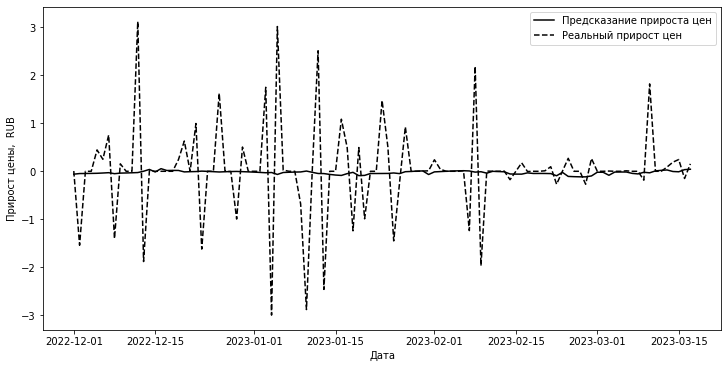

In [33]:
pred_val(y_test_orig, y_pred_orig)

### Multivariate models

In [34]:
df_alph = df_alph_full.copy()
df_alph = df_alph.select_dtypes(include=numerics)

In [35]:
df_alph.head(5)

,Indicative,YTM Indicative,G-spread,t,RUCBITR3+,RUCBCP3A3YNS,indexes,Ставка RUONIA,USD/RUB (FX),"Объем рынка корпоративных облигаций - Россия, RUB",Россия базовые потребительские цены,Россия уровень инфляции в годовом выражении,RUB Yield Curve 10Y,"Объем рынка ОФЗ - Россия, RUB",Россия уровень безработицы
key_0,,,,,,,,,,,,,,,
2022-05-01,90.11,14.3698,464.097653,0,538.48,95.73,14.0,13.68,73.35063,16888.34,100.4,17.1,10.3203,15723.28,3.9
2022-05-02,90.11,14.3698,464.097653,1,538.48,95.73,14.0,13.68,70.92121,16888.34,100.4,17.1,10.3203,15723.28,3.9
2022-05-03,90.11,14.3698,464.097653,2,538.48,95.73,14.0,13.68,68.13433,16888.34,100.4,17.1,10.3203,15723.28,3.9
2022-05-04,91.40,13.3890,338.819327,3,538.48,95.73,14.0,13.68,66.08850,16888.34,100.4,17.1,10.3203,15723.28,3.9
2022-05-05,91.00,13.7200,356.441253,4,537.53,95.75,11.0,14.00,65.88899,16888.34,100.4,17.1,10.4369,15723.28,3.9


In [36]:
outliers = {}
for name in df_alph.select_dtypes(include = numerics).columns:
  outliers['{}'.format(name)] = find_outliers_IQR(df_alph[name])

for name in df_alph.select_dtypes(include = numerics).columns:
  if len(outliers[name]) > 0:
    df_alph[name] = cap_outliers_by_list(df_alph[name])

for name in df_alph.select_dtypes(include = numerics).columns:
    df_alph.loc[df_alph[('2022-09'<df_alph.index) & (df_alph.index<='2022-12')].index, name] = cap_outliers_by_list(df_alph.loc[df_alph[('2022-09'<df_alph.index) & (df_alph.index<='2022-12')].index, name])

In [37]:
df_alph = (df_alph - df_alph.shift(1)).dropna()

In [38]:

for name in df_alph.select_dtypes(include = numerics).columns:
    df_alph.loc[df_alph[('2022-08-30'<df_alph.index) & (df_alph.index<='2022-12')].index, name] = cap_outliers_by_list(df_alph.loc[df_alph[('2022-08-30'<df_alph.index) & (df_alph.index<='2022-12')].index, name])

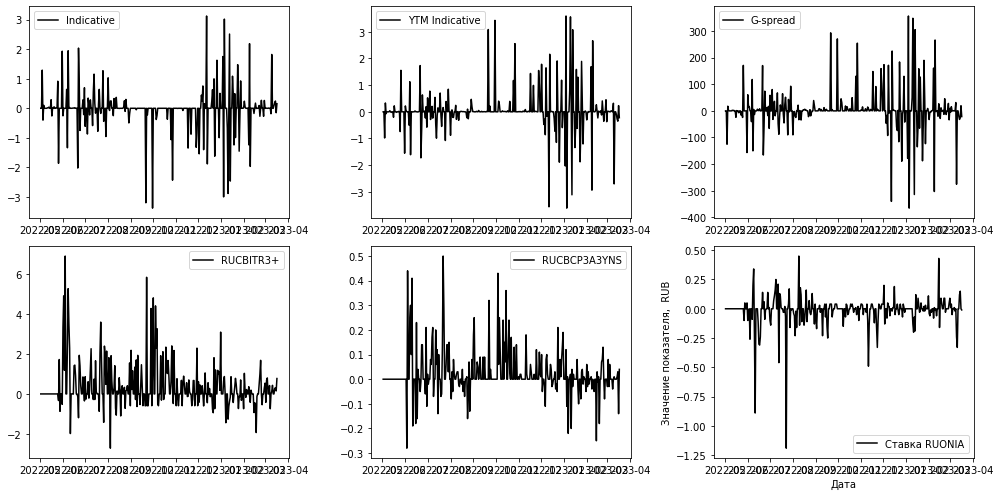

In [39]:
fac_plots(df_alph.drop(['t', 'indexes'], axis = 1))

In [40]:
df_alph['t'] = [i for i in range(len(df_alph))]

In [41]:
df_alph.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 320 entries, 2022-05-02 to 2023-03-17
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Indicative                                         320 non-null    float64
 1   YTM Indicative                                     320 non-null    float64
 2   G-spread                                           320 non-null    float64
 3   t                                                  320 non-null    int64  
 4   RUCBITR3+                                          320 non-null    float64
 5   RUCBCP3A3YNS                                       320 non-null    float64
 6   indexes                                            320 non-null    float64
 7   Ставка RUONIA                                      320 non-null    float64
 8   USD/RUB (FX)                                       320 non-null    floa

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 320 entries, 2022-05-02 to 2023-03-17
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Indicative                                         320 non-null    float64
 1   YTM Indicative                                     320 non-null    float64
 2   G-spread                                           320 non-null    float64
 3   t                                                  320 non-null    int64  
 4   RUCBITR3+                                          320 non-null    float64
 5   RUCBCP3A3YNS                                       320 non-null    float64
 6   indexes                                            320 non-null    float64
 7   Ставка RUONIA                                      320 non-null    float64
 8   USD/RUB (FX)                                       320 non-null    floa

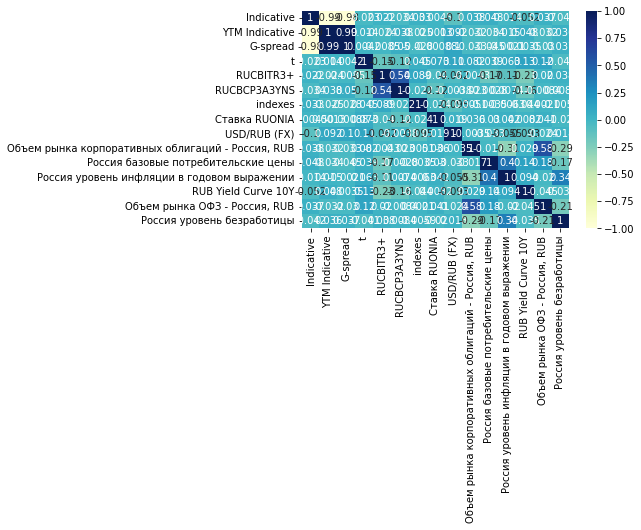

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ - 4
key_0
2022-05-04    1.290
2022-05-05   -0.400
2022-05-06    0.100
2022-05-11    0.015
2022-05-12    0.015
              ...  
2023-03-13    0.090
2023-03-14    0.190
2023-03-15    0.245
2023-03-16   -0.150
2023-03-17    0.155
Name: Indicative, Length: 126, dtype: float64
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ - 5


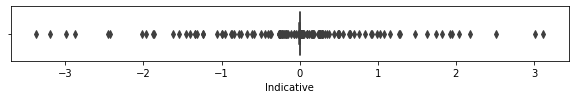

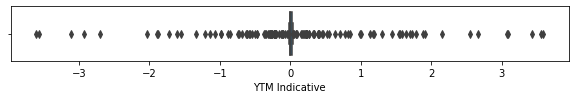

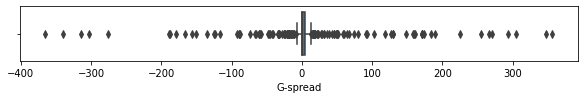

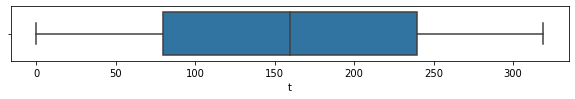

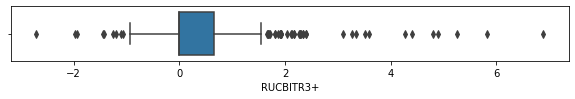

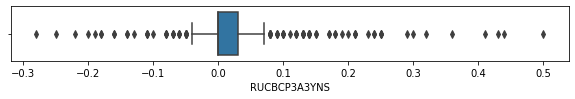

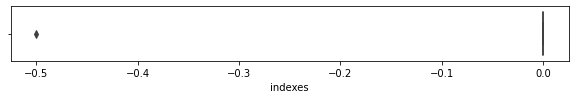

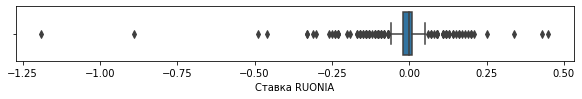

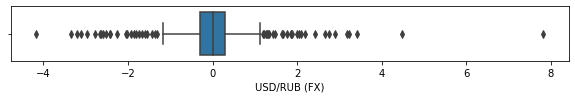

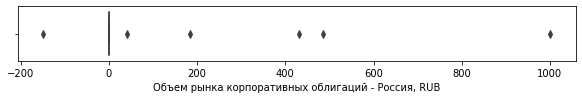

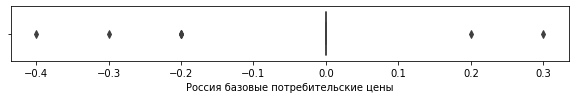

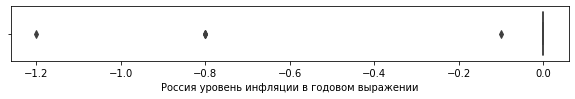

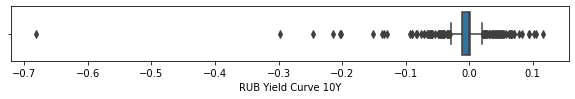

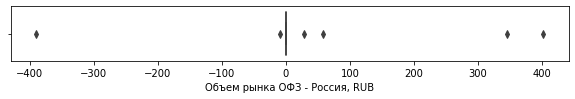

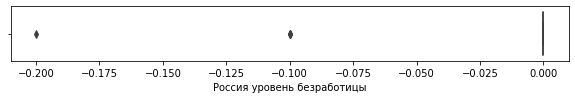

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ - 6


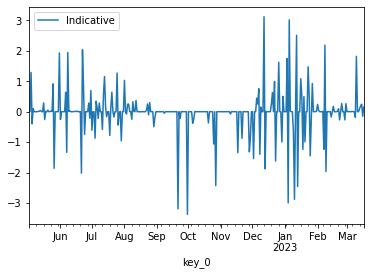

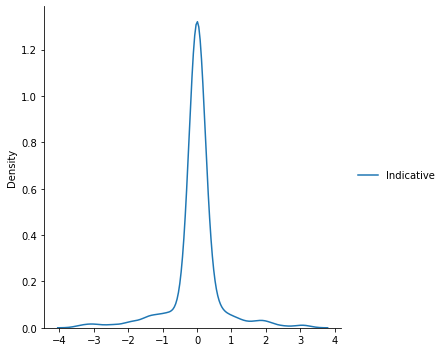

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ - 7
Тест Jarque Bera
        JB               p-value                 skew             kurtosis     
-------------------------------------------------------------------------------
818.6849585635122 1.678108508255514e-178 -0.5307005163384946 10.763684675467934
-------------------------------------------------------------------------------

Тест Шапиро-Уилк
Statistics=0.673, p-value=0.000
Отклонить гипотезу о нормальности
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ - 8
Тест Jarque Bera
        JB               p-value                 skew             kurtosis     
-------------------------------------------------------------------------------
818.6849585635122 1.678108508255514e-178 -0.5307005163384946 10.763684675467934
-------------------------------------------------------------------------------

Тест Шапиро-Уилк
Statistics=0.673, p-value=0.000
Отклонить гипотезу о нормальности
None


c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


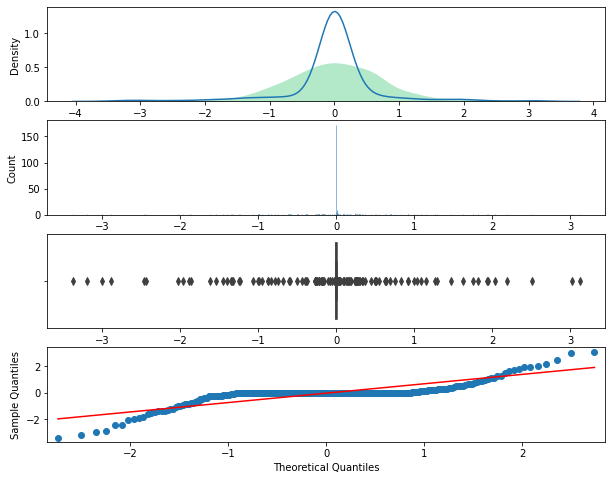

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ - 9


c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


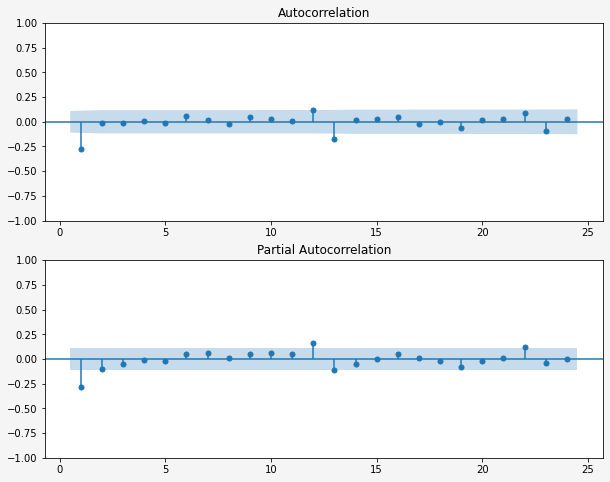

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ - 10
Тестирование средних. Статистика Стьюдента: 0.02641114323450188. Критическое значение: 1.6544935026291934
Тестирование дисперсий. Статистика Фишера: 1.825266644779815. Критическое значение: 1.2991010723726828
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ - 11
excess kurtosis of normal distribution (should be 0): 7.763684675467934
skewness of normal distribution (should be 0): -0.5307005163384946


In [42]:
ult_analysis(df_alph)

In [43]:
siegel_tukey(df_alph['Indicative'])
test_mannwhitneyu(df_alph['Indicative'])

z value: 2.107
Probably different distributions
stat=1.3e+04, p=1.3e+04
Probably the same distribution


<AxesSubplot:>

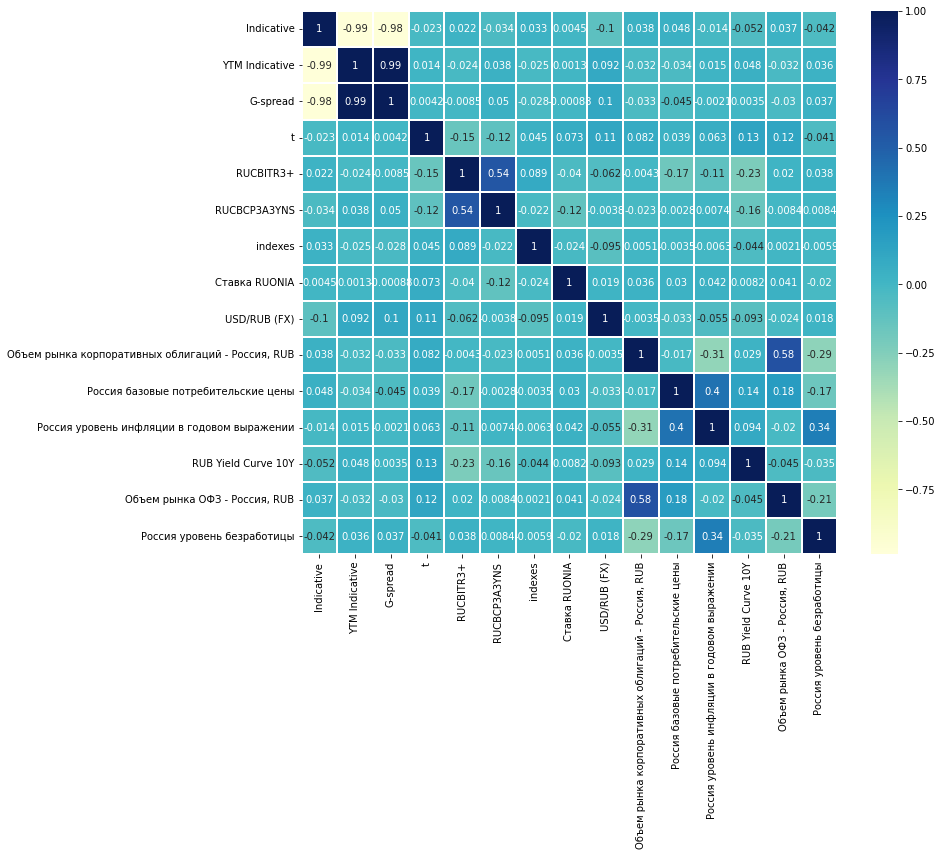

In [44]:
corrmat = df_alph.corr(method='pearson')

corrmat_significance = np.abs(corrmat/np.sqrt(1-np.power(corrmat,2))*np.sqrt(70))
corrmat_significance.values[[np.arange(corrmat_significance.shape[0])]*2] = 0

f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1, annot=True, vmax=1)

### Feature selection

In [45]:
for name in df_alph.drop('Indicative', axis = 1).columns:
    df_alph[name] = df_alph[name].shift(1)
df_alph = df_alph.dropna()

In [46]:
X = df_alph.drop('Indicative', axis = 1).select_dtypes(include=numerics)
Y = df_alph['Indicative']

In [47]:
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
set_printoptions(precision=3)
print(fit.scores_)

[2.076 2.152 1.452 0.562 0.685   inf 0.347 2.847 0.479 0.426 0.67  2.667
 0.266 0.459]


c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[177.145  16.27   35.965  18.401 132.882  19.645  96.738  19.607   7.084
  17.29   98.02   11.984 159.395  14.163]

In [48]:
X.columns

Index(['YTM Indicative', 'G-spread', 't', 'RUCBITR3+', 'RUCBCP3A3YNS',
       'indexes', 'Ставка RUONIA', 'USD/RUB (FX)',
       'Объем рынка корпоративных облигаций - Россия, RUB',
       'Россия базовые потребительские цены',
       'Россия уровень инфляции в годовом выражении', 'RUB Yield Curve 10Y',
       'Объем рынка ОФЗ - Россия, RUB', 'Россия уровень безработицы'],
      dtype='object')

In [49]:
# alph_feat = df_alph[['Indicative', 'YTM Indicative', 'G-spread', 'indexes', 'RUCBITR3+']]
alph_feat = df_alph[['Indicative', 'YTM Indicative', 'indexes', 'USD/RUB (FX)']]

In [50]:
alph_feat.head(2)

,Indicative,YTM Indicative,indexes,USD/RUB (FX)
key_0,,,,
2022-05-03,0.00,0.0,0.0,-2.42942
2022-05-04,1.29,0.0,0.0,-2.78688


In [51]:
len(df_alph)

319

## Modeling

### Random forest

In [52]:
y = alph_feat['Indicative']
X = alph_feat.drop('Indicative', axis = 1)

In [53]:
n_test = 107
X_train, X_test, y_train, y_test = X[:-n_test], X[-n_test:], y[:-n_test], y[-n_test:]

In [54]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from skopt.space import Real, Integer
from skopt.utils import use_named_args

n_features = X.shape[1]

reg = XGBRegressor(n_estimators=50, random_state=0)
space  = [Integer(1, 5, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(1, n_features, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf'),
          Integer(2, 100, name='n_estimators')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train,  cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

print("Best score=%.4f" % res_gp.fun)

print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d
- n_estimators=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2], res_gp.x[3],
                            res_gp.x[4], res_gp.x[5]))


c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\compat.py:85: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Best score=0.2772
Best parameters:
- max_depth=1
- learning_rate=0.064850
- max_features=1
- min_samples_split=36
- min_samples_leaf=1
- n_estimators=31


MSE = 0.8608


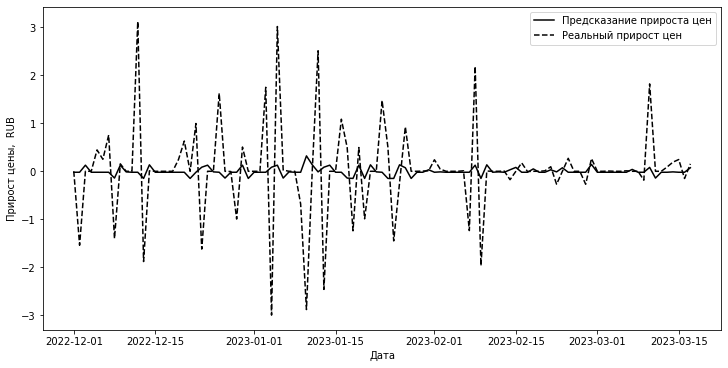

In [55]:

regressor = XGBRegressor(max_depth=res_gp.x[0], learning_rate=res_gp.x[1], max_features=res_gp.x[2], min_samples_split=res_gp.x[3], min_samples_leaf=res_gp.x[4], n_estimators=res_gp.x[5])
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

pred_val(y_test, predictions)

In [56]:
# prediction = []
# X_data = X_train.copy()
# y_data = y_train.copy()
# regressor = XGBRegressor(max_depth=3, learning_rate=0.060154, max_features=4, min_samples_split=2, min_samples_leaf=100, n_estimators=80)
# for t in X_test.index:
#    model = (regressor.fit(X_data.values, y_data.values))
#    pred = model.predict(X_test.loc[t])
#    prediction.append(pred)
#    X_data = X_data.append(X_test.loc[t])
#    y_data.loc[t] = y_test.loc[t]

MSE = 0.8669


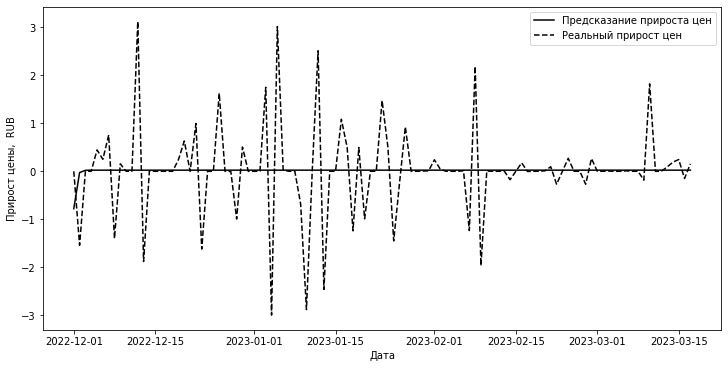

In [57]:
pred_val(y_test, prediction)

In [77]:
n_features = X.shape[1]

reg = RandomForestRegressor(n_estimators=50, random_state=0)
space  = [Integer(1, 5, name='max_depth'),
          Integer(1, n_features, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf'),
          Integer(2, 100, name='n_estimators')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train,  cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

print("Best score=%.4f" % res_gp.fun)

print("""Best parameters:
- max_depth=%d
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d
- n_estimators=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2], res_gp.x[3],
                            res_gp.x[4]))


Best score=0.2500
Best parameters:
- max_depth=2
- max_features=2
- min_samples_split=76
- min_samples_leaf=61
- n_estimators=34


MSE = 0.8842


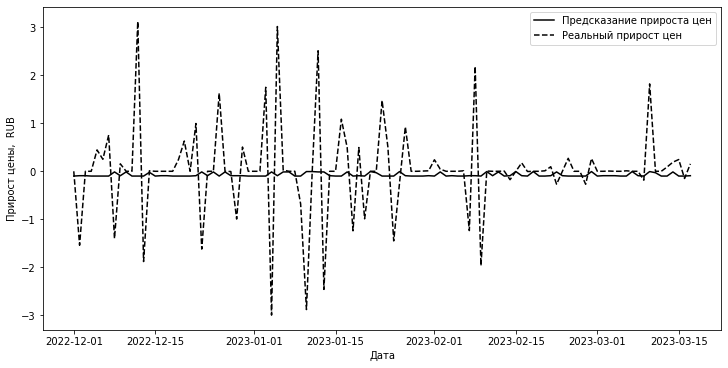

In [78]:

regressor = RandomForestRegressor(max_depth=res_gp.x[0], max_features=res_gp.x[1], min_samples_split=res_gp.x[2], min_samples_leaf=res_gp.x[3], n_estimators=res_gp.x[4])
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

pred_val(y_test, predictions)

In [60]:
# prediction = []
# X_data = X_train.copy()
# y_data = y_train.copy()
# regressor = RandomForestRegressor(max_depth=1, max_features=2, min_samples_split=100, min_samples_leaf=21, n_estimators=100)
# for t in X_test.index:
#    model = (regressor.fit(X_data.values, y_data.values))
#    pred = model.predict(X_test.loc[t].reshape(1, -1))
#    prediction.append(pred)
#    X_data = X_data.append(X_test.loc[t])
#    y_data.loc[t] = y_test.loc[t]

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

n_features = X.shape[1]

reg = GradientBoostingRegressor(n_estimators=50, random_state=0)
space  = [Integer(1, 5, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(1, n_features, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf'),
          Integer(2, 100, name='n_estimators')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train,  cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

print("Best score=%.4f" % res_gp.fun)

print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d
- n_estimators=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2], res_gp.x[3],
                            res_gp.x[4], res_gp.x[5]))


Best score=0.2546
Best parameters:
- max_depth=5
- learning_rate=0.027875
- max_features=1
- min_samples_split=100
- min_samples_leaf=48
- n_estimators=2


In [62]:
0.01023/0.01038

0.9855491329479767

MSE = 0.8677


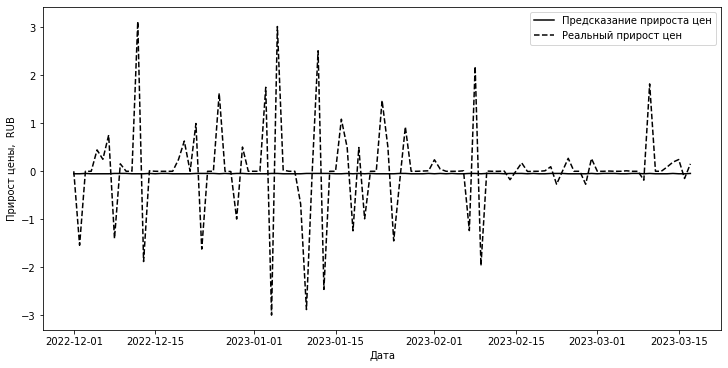

In [63]:

regressor = GradientBoostingRegressor(max_depth=res_gp.x[0], learning_rate=res_gp.x[1], max_features=res_gp.x[2], min_samples_split=res_gp.x[3], min_samples_leaf=res_gp.x[4], n_estimators=res_gp.x[5])
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

pred_val(y_test, predictions)

In [64]:
from sklearn.ensemble import HistGradientBoostingRegressor

reg = HistGradientBoostingRegressor()
space  = [Integer(1, 5, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(1, 100, name='min_samples_leaf')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

print("Best score=%.4f" % res_gp.fun)

print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- min_samples_leaf=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2]))


Best score=0.2546
Best parameters:
- max_depth=1
- learning_rate=0.000179
- min_samples_leaf=71


MSE = 0.868


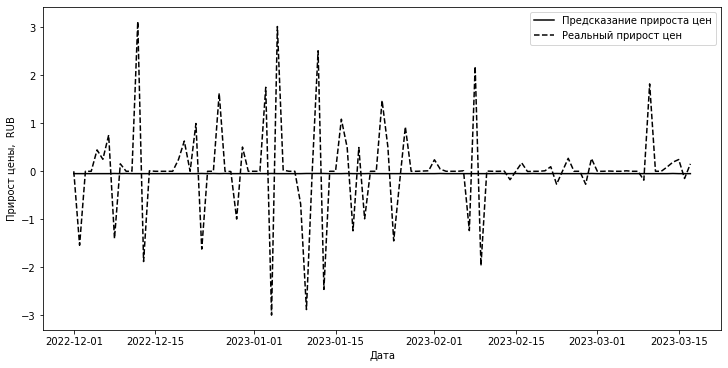

In [65]:
regressor = HistGradientBoostingRegressor(max_depth=res_gp.x[0], learning_rate=res_gp.x[1], min_samples_leaf=res_gp.x[2])
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

pred_val(y_test, predictions)

In [66]:
from sklearn.ensemble import AdaBoostRegressor

reg = AdaBoostRegressor(loss = 'linear')
space  = [Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(2, 100, name='n_estimators')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

print("Best score=%.4f" % res_gp.fun)

print("""Best parameters:
- learning_rate=%.6f
- n_estimators=%d""" % (res_gp.x[0], res_gp.x[1]))


c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\opt

Best score=0.2669
Best parameters:
- learning_rate=0.000215
- n_estimators=73


MSE = 0.8737


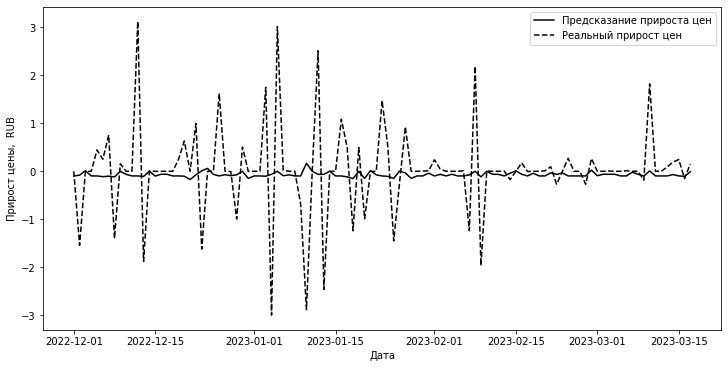

In [67]:
regressor = AdaBoostRegressor(loss = 'linear', learning_rate=res_gp.x[0], n_estimators=res_gp.x[1])
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

pred_val(y_test, predictions)

In [68]:
from sklearn.ensemble import BaggingRegressor

reg = BaggingRegressor(n_estimators=50, random_state=0)
space  = [Integer(1, 5, name='max_samples'),
          Integer(1, n_features, name='max_features'),
          Integer(1, 100, name='verbose'),
          Integer(2, 100, name='n_estimators')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train,  cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

print("Best score=%.4f" % res_gp.fun)

print("""Best parameters:
- max_samples=%d
- max_features=%d
- verbose=%d
- n_estimators=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2], res_gp.x[3]))


c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best score=0.2237
Best parameters:
- max_samples=1
- max_features=2
- verbose=100
- n_estimators=2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Building estimator 1 of 2 for this parallel run (total 2)...
Building estimator 2 of 2 for this parallel run (total 2)...
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
MSE = 0.8631


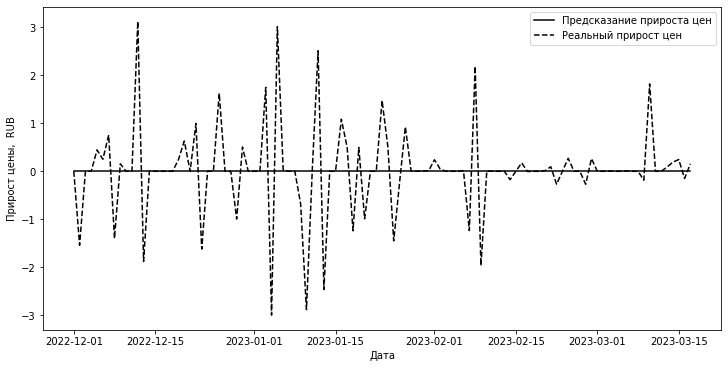

In [69]:
regressor = BaggingRegressor(max_samples=res_gp.x[0], max_features=res_gp.x[1], verbose=res_gp.x[2], n_estimators=res_gp.x[3])
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

pred_val(y_test, predictions)

In [70]:
from lineartree           import LinearBoostRegressor

reg = LinearBoostRegressor(base_estimator=LinearRegression(), loss = 'linear')
space  = [Integer(1, 5, name='max_depth'),
          Integer(1, n_features, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf'),
          Integer(2, 100, name='n_estimators')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train,  cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

print("Best score=%.4f" % res_gp.fun)

print("""Best parameters:
- max_depth=%d
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d
- n_estimators=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2], res_gp.x[3],
                            res_gp.x[4]))

Best score=0.2793
Best parameters:
- max_depth=5
- max_features=1
- min_samples_split=100
- min_samples_leaf=100
- n_estimators=2


MSE = 0.8233


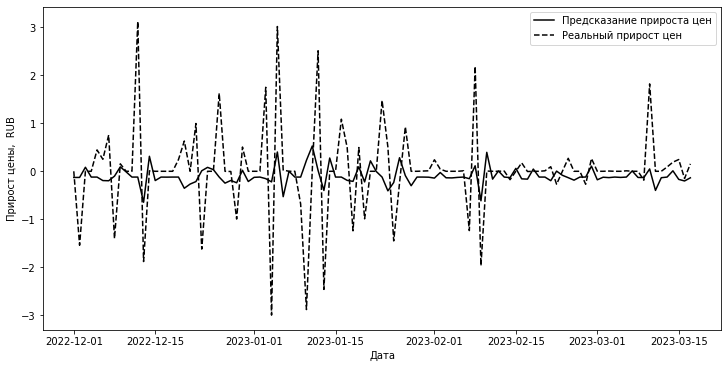

In [71]:
regressor = LinearBoostRegressor(base_estimator=LinearRegression(),
                                 max_depth=res_gp.x[0], max_features=res_gp.x[1], min_samples_split=res_gp.x[2], min_samples_leaf=res_gp.x[3], n_estimators=res_gp.x[4])
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

pred_val(y_test, predictions)

In [72]:
from sklearn.tree import DecisionTreeRegressor 

reg = DecisionTreeRegressor(random_state = 0) 
space  = [Integer(1, 5, name='max_depth'),
          Integer(1, n_features, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train,  cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

print("Best score=%.4f" % res_gp.fun)

print("""Best parameters:
- max_depth=%d
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2], res_gp.x[3]))


Best score=0.2535
Best parameters:
- max_depth=2
- max_features=1
- min_samples_split=82
- min_samples_leaf=61


MSE = 0.8599


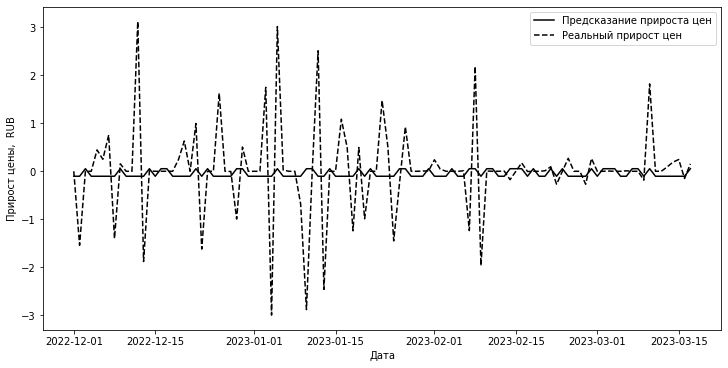

In [73]:
regressor = DecisionTreeRegressor(max_depth=res_gp.x[0], max_features=res_gp.x[1], min_samples_split=res_gp.x[2], min_samples_leaf = res_gp.x[3])
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

pred_val(y_test, predictions)